In [11]:
# imports 
import tensorflow as tf
import numpy as np
import os, sys
import monai
import PIL

import matplotlib.pyplot as plt


In [50]:
def parse_tfrecord_fn(example):
    feature_description = {
            # image size, dimensions of 3 consecutive slices
            'dsize_dim0': tf.io.FixedLenFeature([], tf.int64), # 256
            'dsize_dim1': tf.io.FixedLenFeature([], tf.int64), # 256
            'dsize_dim2': tf.io.FixedLenFeature([], tf.int64), # 3
            # label size, dimension of the middle slice
            'lsize_dim0': tf.io.FixedLenFeature([], tf.int64), # 256
            'lsize_dim1': tf.io.FixedLenFeature([], tf.int64), # 256
            'lsize_dim2': tf.io.FixedLenFeature([], tf.int64), # 1
            # image slices of size [256, 256, 3]
            'data_vol': tf.io.FixedLenFeature([], tf.string),
            # label slice of size [256, 256, 1]
            'label_vol': tf.io.FixedLenFeature([], tf.string)}
    
    example = tf.io.parse_single_example(example, feature_description)
    return example



def decode_fn(example):
    # Decode string to bytes
    d0 = tf.cast(example['dsize_dim0'], tf.int32)
    d1 = tf.cast(example['dsize_dim1'], tf.int32)
    d2 = tf.cast(example['dsize_dim2'], tf.int32)
    l0 = tf.cast(example['lsize_dim0'], tf.int32)
    l1 = tf.cast(example['lsize_dim1'], tf.int32)
    l2 = tf.cast(example['lsize_dim2'], tf.int32)
    data_vol = tf.io.decode_raw(example['data_vol'], tf.float32)
    label_vol = tf.io.decode_raw(example['label_vol'], tf.float32)

    print(data_vol.shape)
    print(label_vol.shape)

    # Reshape the data to the desired shape [256, 256, 3]
    data_vol = tf.reshape(data_vol, [example['dsize_dim0'], example['dsize_dim1'], example['dsize_dim2']])
    # Reshape the label to the desired shape [256, 256, 1]
    label_vol = tf.reshape(label_vol, [example['lsize_dim0'], example['lsize_dim1'], example['lsize_dim2']])



    return data_vol, label_vol


In [79]:
def visualize_tfrecord(tfrecord_path, num_samples=1):
    dataset = tf.data.TFRecordDataset(tfrecord_path)

# Parse the TFRecords file using the parse_tfrecord_fn
    parsed_dataset = dataset.map(parse_tfrecord_fn)

    # Decode and preprocess the data using the decode_fn
    decoded_dataset = parsed_dataset.map(decode_fn)



    # Visualize a single example
    for data_vol, label_vol in decoded_dataset.take(1):
        plt.figure(figsize=(10, 5))
        # Display the input image
        plt.subplot(1, 2, 1)
        datavol = data_vol.numpy()

        data_vol_im = (data_vol - tf.reduce_min(data_vol)) / (tf.reduce_max(data_vol) - tf.reduce_min(data_vol))

        
        #print(tf.squeeze(label_vol).numpy())
        plt.imshow(data_vol_im)   

        # You can use img_arr numpy array above to directly augment/preprocess
        # your image without saving it to .png.
        #img = PIL.Image.fromarray(img_arr)
        #plt.imshow(img)
        plt.title('Input Image')
        label_vol = label_vol.numpy()
        unique_values_orig = np.unique(label_vol)

        # Print the unique values

        print("Unique Values first:", unique_values_orig)
        
        
        label_vol_im = (label_vol - tf.reduce_min(label_vol)) / (tf.reduce_max(label_vol) - tf.reduce_min(label_vol))
        unique_values = np.unique(label_vol_im)

        # Print the unique values
        print("Unique Values:", unique_values)
        # Display the label image
        plt.subplot(1, 2, 2)
        plt.imshow(label_vol_im)
        plt.title('Label Image')

    plt.show()

(None,)
(None,)
Unique Values first: [0. 1. 3.]
Unique Values: [0.         0.33333334 1.        ]


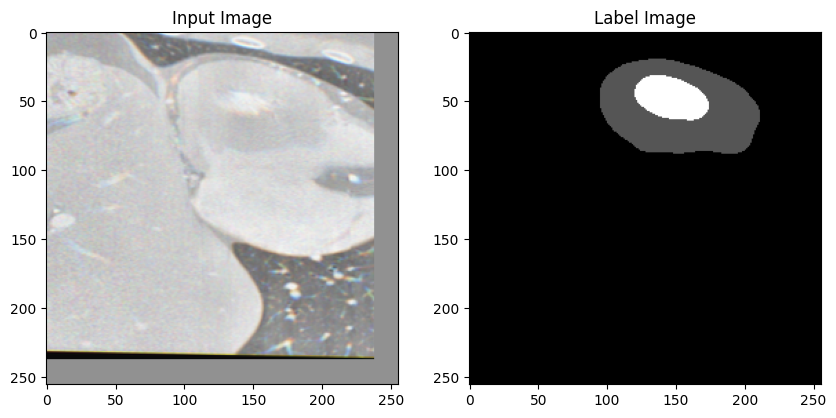

In [80]:
# Specify the path to your TFRecord file
tfrecord_path = '../../PnpAda_release_data/train_val/ct_train_tfs/ct_train_slice400.tfrecords'

# Visualize the TFRecord
visualize_tfrecord(tfrecord_path, num_samples=1)